In [2]:
#CREDIT CARD FRAUD DETECTION
#Naive Bayes Classifier algorithm

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score

#Data Handling: Load dataset (CSV file)
df = pd.read_csv("creditcard.csv")

#List of features, data shape, statical description
print("\nDimension")
print(df.shape)

print("\nFirst Five Lines ")
print(df.head(5))



Dimension
(284807, 31)

First Five Lines 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

In [3]:
print("\nDescribe ")
print(df.describe())



Describe 
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+

In [4]:
print("\nInformation")
print(df.info())



Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null 

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class as PIE CHART


Text(0, 0.5, '')

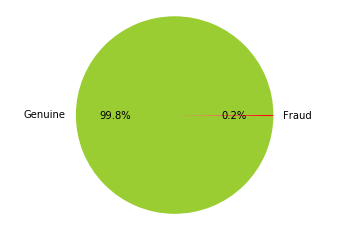

In [6]:
print("Class as PIE CHART")
fig,ax = plt.subplots(1,1)
ax.pie(df.Class.value_counts(), autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal') 
plt.ylabel('')

In [7]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

The dataset is highly imbalanced.

0 ------> Normal Transactions 

1 ------> Fraudulent Transactions

Text(0, 0.5, 'Frequency')

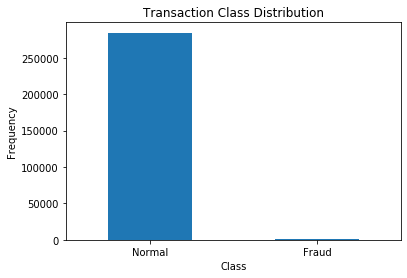

In [8]:
count_class = df['Class'].value_counts(sort = True)
count_class.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
labels = ["Normal","Fraud"]
plt.xticks(range(2),labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
Fraud = df[df['Class'] == 1]
Normal = df[df['Class'] == 0]

print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


Time Variable

284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_hr, dtype: float64


Text(63.125, 0.5, 'Transactions')

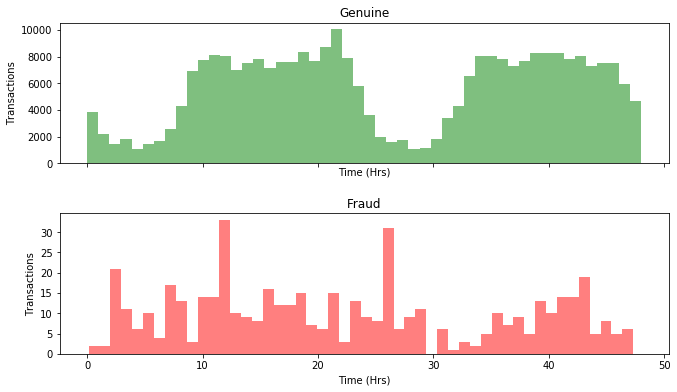

In [10]:
# Plot time to see if there is any trend
print("Time Variable\n")
df['Time_hr'] = df['Time']/3600
print(df['Time_hr'].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))
fig.tight_layout(pad=4.0)

ax1.hist(df.Time_hr[df.Class == 0], bins=50,color='g', alpha=0.5)
ax1.set_title("Genuine")
ax1.set_xlabel("Time (Hrs)")
ax1.set_ylabel("Transactions")

ax2.hist(df.Time_hr[df.Class == 1], bins=50,color='r', alpha=0.5)
ax2.set_title("Fraud")
plt.xlabel("Time (Hrs)")
plt.ylabel("Transactions")


In [75]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hr
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0.000556
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0.001111
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0.001944
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0.001944
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0.002500


In [11]:
#df1 = df.copy()
df = df.drop('Time',axis=1)
#df

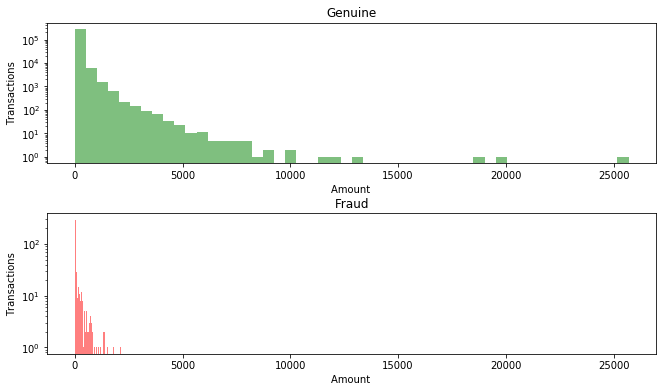

In [12]:
fig, (ax3,ax4) = plt.subplots(2, 1, figsize = (10,6), sharex=True)
fig.tight_layout(pad=4.0)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_title("Genuine")
ax3.set_xlabel("Amount ")
ax3.set_ylabel("Transactions")
ax3.set_yscale('log')
ax3.tick_params(axis='both', which='both', labelbottom=True)

ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_title("Fraud")
ax4.set_xlabel("Amount ")
ax4.set_ylabel("Transactions")
ax4.set_yscale('log')


In [13]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop('Amount',axis=1)

In [33]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_hr,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.000000,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000000,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.000278,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.000278,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.000556,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,0.000556,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,0.001111,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,0.001944,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.001944,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,0.002500,-0.338516


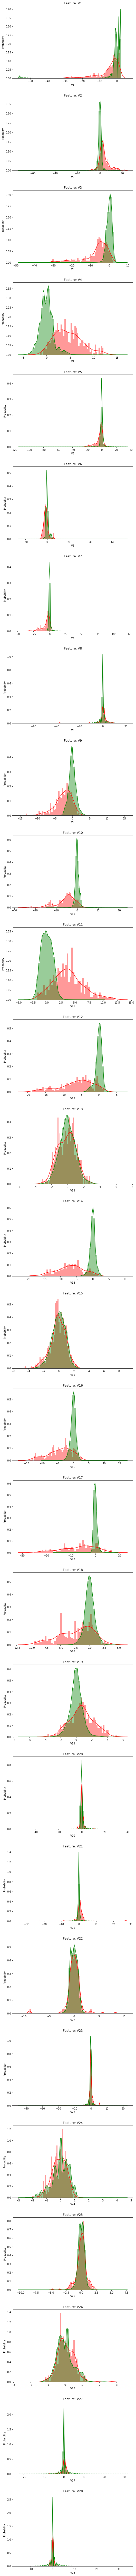

In [41]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(8,28*5))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel(str(col))
    ax5.set_ylabel('Probablity')
    ax5.set_title('Feature: ' + str(col))
plt.tight_layout(pad=3.0)
plt.show()

In [30]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values # drop features which are not useful
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

    print("Train-set size: ", len(y_train), "\nTest-set size: ", len(y_test))
    print("Fraud cases in Test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [21]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('Train-set Confusion Matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [22]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('Test-set Confusion Matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("Recall Score: ", recall_score(y_test,y_pred))
    print("Precision Score: ", precision_score(y_test,y_pred))
    print("F1 Score: ", f1_score(y_test,y_pred))
    print("Accuracy Score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [23]:
from sklearn.naive_bayes import GaussianNB

In [26]:
# Case-NB-1 : without drop any features
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Train-set size:  227845 
Test-set size:  56962
Fraud cases in Test-set:  98
Train-set Confusion Matrix:
 [[222480   4971]
 [    69    325]]
Test-set Confusion Matrix:
 [[55535  1329]
 [   15    83]]
Recall Score:  0.8469387755102041
Precision Score:  0.058781869688385266
F1 Score:  0.10993377483443707
Accuracy Score:  0.9764053228468101
ROC AUC: 0.963247971529636


In [31]:
#Case-NB-2 : drop some of principle components 
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_hr',
       'scaled_Amount'],
      dtype='object')
Train-set size:  227845 
Test-set size:  56962
Fraud cases in Test-set:  98
Train-set Confusion Matrix:
 [[223967   3484]
 [    61    333]]
Test-set Confusion Matrix:
 [[55935   929]
 [   12    86]]
Recall Score:  0.8775510204081632
Precision Score:  0.08472906403940887
F1 Score:  0.15453728661275834
Accuracy Score:  0.9834802148800955
ROC AUC: 0.9622034097825962


In [35]:
# Case-NB-3 : drop some of principle components + Time 
drop_list = ['Time_hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
Train-set size:  227845 
Test-set size:  56962
Fraud cases in Test-set:  98
Train-set Confusion Matrix:
 [[223964   3487]
 [    60    334]]
Test-set Confusion Matrix:
 [[55936   928]
 [   12    86]]
Recall Score:  0.8775510204081632
Precision Score:  0.08481262327416174
F1 Score:  0.15467625899280577
Accuracy Score:  0.9834977704434535
ROC AUC: 0.9613612643988377


In [37]:
# Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'
drop_list = ['scaled_Amount','Time_hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
Train-set size:  227845 
Test-set size:  56962
Fraud cases in Test-set:  98
Train-set Confusion Matrix:
 [[224025   3426]
 [    60    334]]
Test-set Confusion Matrix:
 [[55954   910]
 [   12    86]]
Recall Score:  0.8775510204081632
Precision Score:  0.08634538152610442
F1 Score:  0.15722120658135283
Accuracy Score:  0.9838137705838981
ROC AUC: 0.9611556179872063
